In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, mannwhitneyu
import warnings as wr
wr.filterwarnings('ignore')


In [14]:
# Load the dataset
df = pd.read_csv('cleaned_healthcare_dataset_stroke.csv')

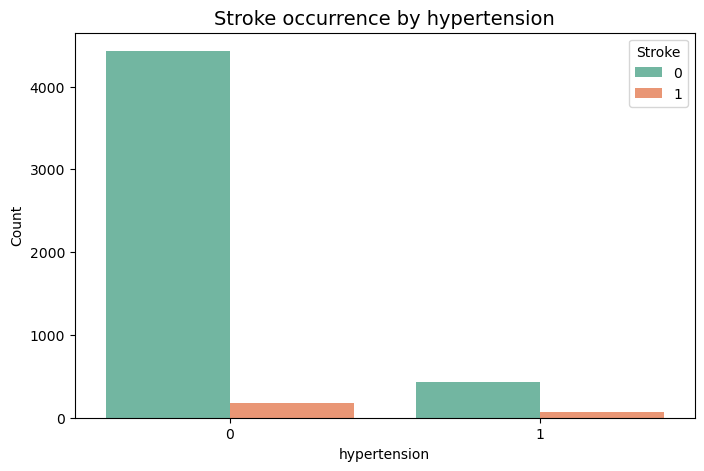

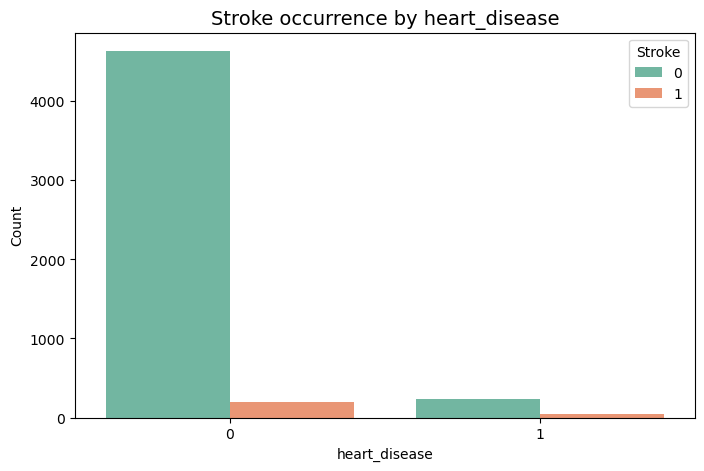

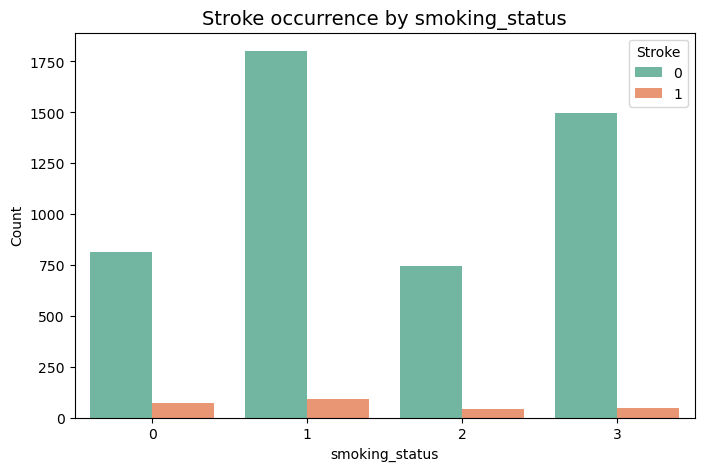

In [15]:
# Risk Factors to check
risk_factors = ['hypertension', 'heart_disease', 'smoking_status', 'bmi']

# Plot comparison for categorical variables
categorical_vars = ['hypertension', 'heart_disease', 'smoking_status']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, hue='stroke', palette='Set2')
    plt.title(f'Stroke occurrence by {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Stroke')
    plt.show()

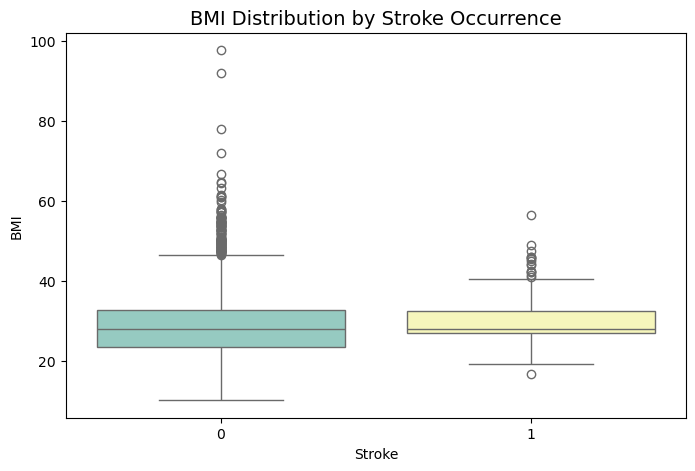

In [16]:
# Plot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set3')
plt.title('BMI Distribution by Stroke Occurrence', fontsize=14)
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

In [20]:

# Statistical Tests
print("\n\t--- Statistical Significance Tests ---\n")

# Chi-Square Test for Categorical Variables
for var in ['hypertension', 'heart_disease', 'smoking_status']:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square Test for {var}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"--> {var} is significantly associated with stroke.\n")
    else:
        print(f"--> {var} is NOT significantly associated with stroke.\n")

# Mann-Whitney U Test for BMI (continuous and not necessarily normally distributed)
stroke_bmi = df[df['stroke'] == 1]['bmi']
non_stroke_bmi = df[df['stroke'] == 0]['bmi']
stat, p = mannwhitneyu(stroke_bmi, non_stroke_bmi, alternative='two-sided')
print(f"Mann-Whitney U Test for BMI: p-value = {p:.4f}")
if p < 0.05:
    print("--> BMI is significantly different between stroke and non-stroke groups.\n")
else:
    print("--> BMI is NOT significantly different between stroke and non-stroke groups.\n")



	--- Statistical Significance Tests ---

Chi-square Test for hypertension: p-value = 0.0000
--> hypertension is significantly associated with stroke.

Chi-square Test for heart_disease: p-value = 0.0000
--> heart_disease is significantly associated with stroke.

Chi-square Test for smoking_status: p-value = 0.0000
--> smoking_status is significantly associated with stroke.

Mann-Whitney U Test for BMI: p-value = 0.0003
--> BMI is significantly different between stroke and non-stroke groups.

